In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df=pd.read_csv("/kaggle/input/iriscsv/Iris.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/iriscsv/Iris.csv'

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.min()

SepalLengthCm    4.3
SepalWidthCm     2.0
PetalLengthCm    1.0
PetalWidthCm     0.1
Species          0.0
dtype: float64

In [ ]:
df.max()

SepalLengthCm    7.9
SepalWidthCm     4.4
PetalLengthCm    6.9
PetalWidthCm     2.5
Species          2.0
dtype: float64

In [ ]:
df.mean()

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
Species          1.000000
dtype: float64

In [ ]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
df.median()

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
Species          1.00
dtype: float64

In [ ]:
df.count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [ ]:
df.std()

SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
Species          0.819232
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
#drop the "ID " coulmn as it is not significant
df=df.drop("Id",axis=1)

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# class labels in the  numerical form 
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
species_colors={0:'red',1:'green',2:'blue'}

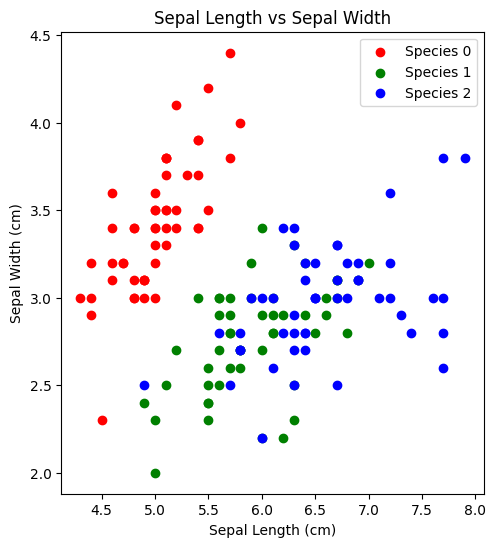

In [ ]:
# scatterplot for sepal length and  width
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for species, color in species_colors.items():
    subset = df[df['Species'] == species]
    plt.scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], label=f'Species {species}', color=color)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()

In [ ]:
# Scatter plots for Petal Length vs Petal Width
plt.subplot(1, 2, 2)
for species, color in species_colors.items():
    subset = df[df['Species'] == species]
    plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'], label=f'Species {species}', color=color)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Violin plots for feature distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='Species', y='SepalLengthCm', data=df, palette=species_colors)
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length Distribution')

plt.subplot(1, 2, 2)
sns.violinplot(x='Species', y='PetalLengthCm', data=df, palette=species_colors)
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.title('Petal Length Distribution')

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

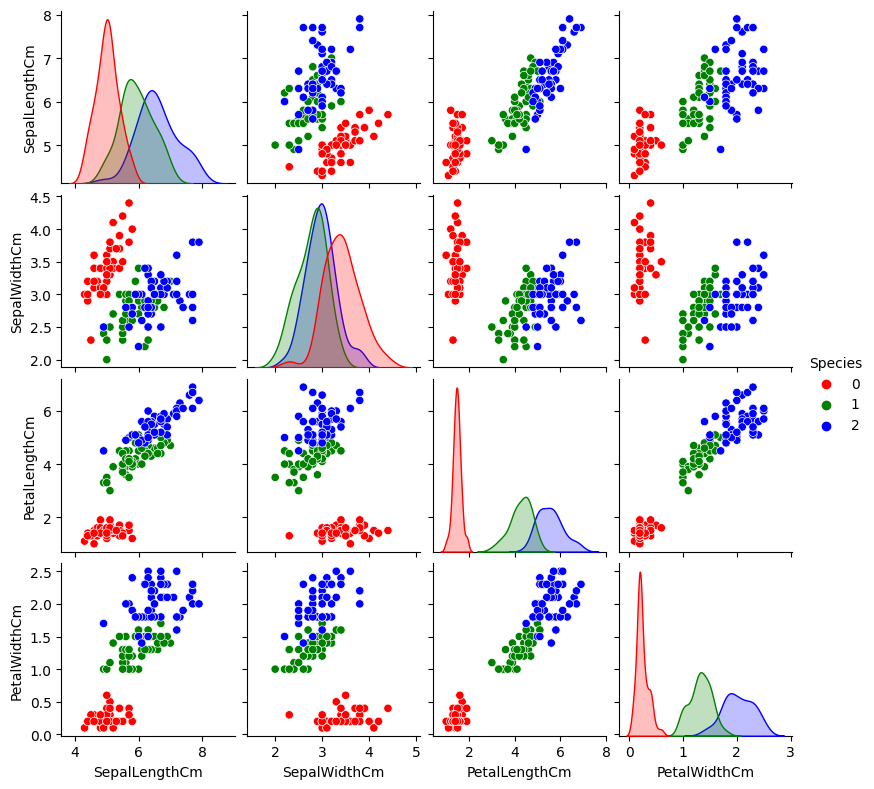

In [ ]:
import warnings

# Suppress the UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

# Create the pairplot
sns.pairplot(df, hue='Species', height=2, palette=species_colors)
plt.show()


 # Plotting histogram for each feature

<Axes: >

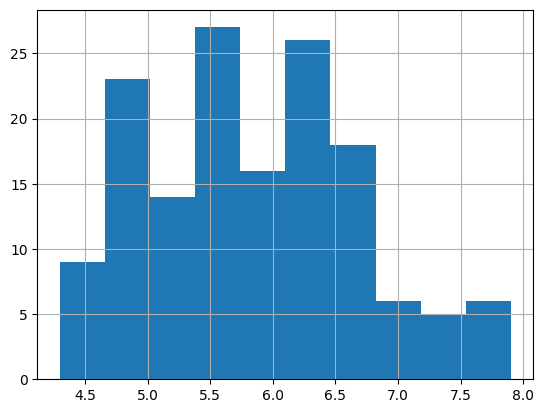

In [ ]:
df['SepalLengthCm'].hist()

<Axes: >

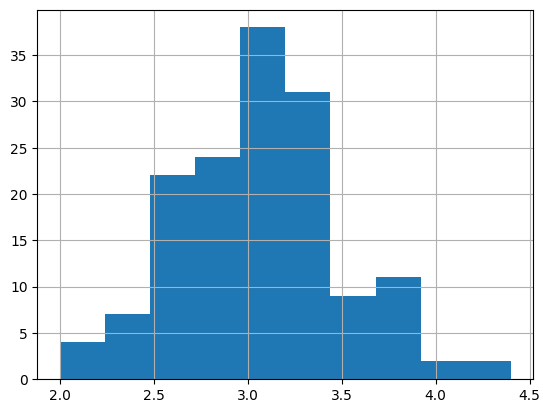

In [ ]:
df['SepalWidthCm'].hist()

<Axes: >

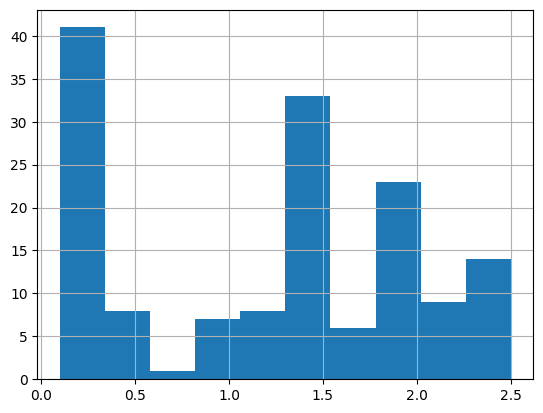

In [ ]:
df['PetalWidthCm'].hist()

<Axes: >

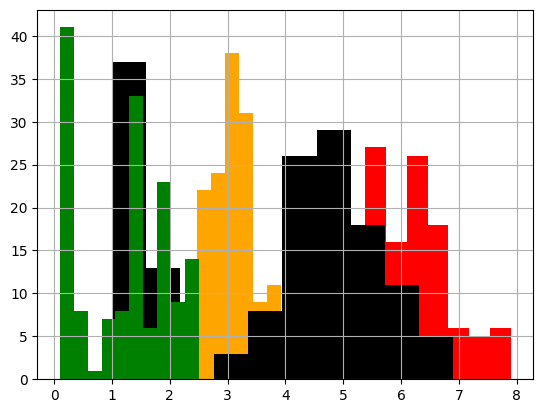

In [ ]:
#histogram for all the features together
df['SepalLengthCm'].hist(color='red')
df['SepalWidthCm'].hist(color='orange')
df['PetalLengthCm'].hist(color='black')
df['PetalWidthCm'].hist(color='green')

# Corelation matrix

In [ ]:
# correlation matix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


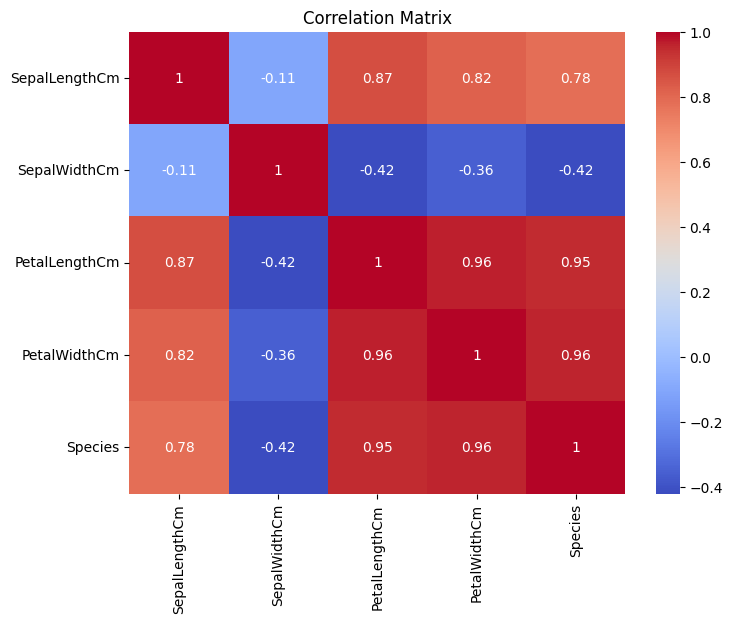

In [ ]:
# Corre matrix and heatmap
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



# Model Training

In [ ]:
# Splitting the data into features (X) and target (y)
X = df.drop('Species', axis=1)
y = df["Species"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Model 1: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Create and train the Logistic Regression model with increased max_iter
model1 = LogisticRegression(max_iter=1000)  # Increase max_iter to an appropriate value
model1.fit(X_train_scaled, y_train)

# Step 3: Make predictions and calculate accuracy
y_pred1 = model1.predict(X_test_scaled)
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy (Logistic Regression): {:.2f}%".format(accuracy1 * 100))

Accuracy (Logistic Regression): 95.56%


In [ ]:
# Model 2: K-nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy (KNN): {:.3f}%".format(accuracy2 * 100))

Accuracy (KNN): 97.778%


In [ ]:
# Model 3: Decision Tree
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy (Decision Tree): {:.2f}%".format(accuracy3 * 100))

Accuracy (Decision Tree): 95.56%


Accuracy (Random Forest): 95.56%


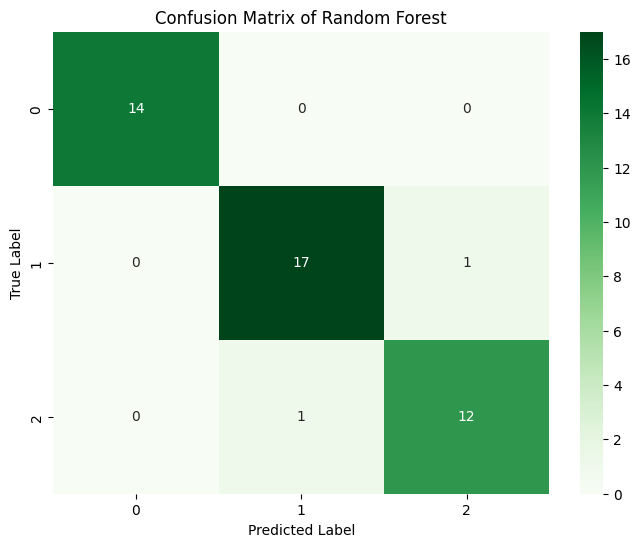

Classification Report (Random Forest):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10}


In [ ]:
# Model 4: Random Forest with Hyperparameter Tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred4 = best_rf.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy (Random Forest): {:.2f}%".format(accuracy4 * 100))  

# Confusion matrix and classification report for Random Forest
conf_matrix4 = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Random Forest')
plt.show()

classification_rep = classification_report(y_test, y_pred4, target_names=le.classes_)
print("Classification Report (Random Forest):\n", classification_rep)
print("Best Hyperparameters:", grid_search.best_params_)  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Create your machine learning models
model1 = LogisticRegression(max_iter=1000)  # Increased max_iter
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()
best_rf = RandomForestClassifier()

# List of models
models = [model1, model2, model3, best_rf]
model_names = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest"]
# Perform cross-validation and print results
for i, model in enumerate(models):
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"{model_names[i]} - Cross-Validation Accuracy: {np.mean(cv_scores):.2f}%")

Logistic Regression - Cross-Validation Accuracy: 0.97%
KNN - Cross-Validation Accuracy: 0.97%
Decision Tree - Cross-Validation Accuracy: 0.96%
Random Forest - Cross-Validation Accuracy: 0.97%


# confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

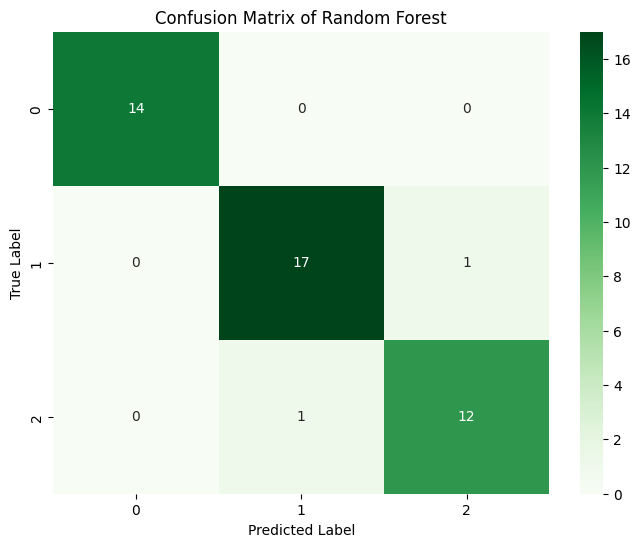

Classification Report (Random Forest):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [ ]:
# Confusion matrix and classification report for Random Forest
conf_matrix4 = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Random Forest')
plt.show()

classification_rep = classification_report(y_test, y_pred4, target_names=le.classes_)
print("Classification Report (Random Forest):\n", classification_rep)